In [1]:
import pandas as pd
from sqlalchemy import create_engine
import time

movies_errors=0
g_errors=0

In [2]:
#movie_start_time = time.time()
movies = "Resources/Movie data/tmdb_5000_movies.csv"
movies_df = pd.read_csv(movies)
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [4]:
movies_df.count()

budget                  4803
genres                  4803
homepage                1712
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
dtype: int64

In [5]:
try:
    movie_transformed = movies_df[["id", "title", "budget", "revenue", "release_date", "vote_average", "vote_count"]]
    movie_transformed.drop_duplicates()
    movie_transformed.set_index("id", inplace=True)
except:
    movies_errors+=1
movie_count=movie_transformed.shape[0]
movie_transformed.head()

,title,budget,revenue,release_date,vote_average,vote_count
id,,,,,,
19995,Avatar,237000000,2787965087,2009-12-10,7.2,11800
285,Pirates of the Caribbean: At World's End,300000000,961000000,2007-05-19,6.9,4500
206647,Spectre,245000000,880674609,2015-10-26,6.3,4466
49026,The Dark Knight Rises,250000000,1084939099,2012-07-16,7.6,9106
49529,John Carter,260000000,284139100,2012-03-07,6.1,2124


In [6]:
movie_transformed.count()

title           4803
budget          4803
revenue         4803
release_date    4802
vote_average    4803
vote_count      4803
dtype: int64

In [7]:
opath = "Resources/Movie data/movie.csv"
movie_transformed.to_csv(opath)

In [8]:
#g_start_time = time.time()
trend = "Resources/google_trends.csv"
trend_df = pd.read_csv(trend)
trend_df = trend_df.rename(columns={"query": "title"})
trend_df.head()

,location,year,category,rank,title
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [9]:
try:
    g_transformed = trend_df[trend_df['location'] == 'Global']
    g_transformed.drop_duplicates("id", inplace=True)
    g_transformed.set_index("id", inplace=True)
    g_transformed.dropna(how="any")
except:
    g_errors+=1
g_count=g_transformed.shape[0]
g_transformed.head()

,location,year,category,rank,title
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [10]:
g_transformed.count()

location    1135
year        1135
category    1135
rank        1135
title       1135
dtype: int64

In [11]:
tpath = "Resources/Movie data/trend.csv"
g_transformed.to_csv(tpath)

In [12]:
connection_string = "postgres:postgres@localhost:5432/Movie_etl"
engine = create_engine(f'postgresql://{connection_string}')

In [13]:
movie_start_time = time.time()
movie_transformed.to_sql(name='movie', con=engine, if_exists='append')
movie_end_time=time.time() - movie_start_time

In [14]:
g_start_time = time.time()
g_transformed.to_sql(name='trend', con=engine, if_exists='replace')
g_end_time=time.time() - g_start_time

In [15]:
print(movie_end_time)
print(g_end_time)

2.5574145317077637
0.6817145347595215


In [16]:
conn = engine.connect()
conn

In [17]:
M = pd.read_sql("SELECT * FROM movie", conn)
M.count()

id              28818
title           28818
budget          28818
revenue         28818
release_date    28812
runtime          4801
vote_average    28818
vote_count      28818
dtype: int64

In [18]:
M1 = M.dropna(how='any')
M1.count()

id              4800
title           4800
budget          4800
revenue         4800
release_date    4800
runtime         4800
vote_average    4800
vote_count      4800
dtype: int64

In [21]:
M

,id,title,budget,revenue,release_date,runtime,vote_average,vote_count
0,19995,Avatar,237000000,2787965087,2009-12-10,162.0,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,2007-05-19,169.0,6.9,4500
2,206647,Spectre,245000000,880674609,2015-10-26,148.0,6.3,4466
3,49026,The Dark Knight Rises,250000000,1084939099,2012-07-16,165.0,7.6,9106
4,49529,John Carter,260000000,284139100,2012-03-07,132.0,6.1,2124
...,...,...,...,...,...,...,...,...
28813,9367,El Mariachi,220000,2040920,1992-09-04,NaN,6.6,238
28814,72766,Newlyweds,9000,0,2011-12-26,NaN,5.9,5
28815,231617,"Signed, Sealed, Delivered",0,0,2013-10-13,NaN,7.0,6
28816,126186,Shanghai Calling,0,0,2012-05-03,NaN,5.7,7


In [22]:
M1

,id,title,budget,revenue,release_date,runtime,vote_average,vote_count
0,19995,Avatar,237000000,2787965087,2009-12-10,162.0,7.2,11800
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,2007-05-19,169.0,6.9,4500
2,206647,Spectre,245000000,880674609,2015-10-26,148.0,6.3,4466
3,49026,The Dark Knight Rises,250000000,1084939099,2012-07-16,165.0,7.6,9106
4,49529,John Carter,260000000,284139100,2012-03-07,132.0,6.1,2124
...,...,...,...,...,...,...,...,...
4799,9367,El Mariachi,220000,2040920,1992-09-04,81.0,6.6,238
4800,72766,Newlyweds,9000,0,2011-12-26,85.0,5.9,5
4801,231617,"Signed, Sealed, Delivered",0,0,2013-10-13,120.0,7.0,6
4802,126186,Shanghai Calling,0,0,2012-05-03,98.0,5.7,7


In [23]:
T = pd.read_sql("SELECT * FROM trend", conn)
T.count()

index       1135
location    1135
year        1135
category    1135
rank        1135
title       1135
dtype: int64

In [24]:
T1 = T.dropna(how='any')
T1.count()

index       1135
location    1135
year        1135
category    1135
rank        1135
title       1135
dtype: int64

In [29]:
etl_report=pd.DataFrame({'domain' : ['movie', 'trend'],
                       'row_counts' : [movie_count, g_count],
                        'processing_time':[str(round(movie_end_time,2)) + ' seconds', str(round(g_end_time,2)) + ' seconds'],
                         'error_count':[movies_errors, g_errors]})

In [30]:
etl_report.to_html('etl_report.html',index=False)

In [31]:
etl_report

,domain,row_counts,processing_time,error_count
0,movie,4803,2.56 seconds,0
1,trend,1135,0.68 seconds,1


In [32]:
combined = pd.merge(M, T, on="title", how="inner")
combined.head()

,id,title,budget,revenue,release_date,runtime,vote_average,vote_count,index,location,year,category,rank
0,49521,Man of Steel,225000000,662845518,2013-06-12,143.0,6.5,6359,5180,Global,2013,Movies,1
1,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
2,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
3,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
4,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1


In [33]:
combined

,id,title,budget,revenue,release_date,runtime,vote_average,vote_count,index,location,year,category,rank
0,49521,Man of Steel,225000000,662845518,2013-06-12,143.0,6.5,6359,5180,Global,2013,Movies,1
1,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
2,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
3,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
4,49521,Man of Steel,225000000,662845518,2013-06-12,NaN,6.5,6359,5180,Global,2013,Movies,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,77930,Magic Mike,7000000,167221571,2012-06-28,NaN,6.1,1040,2959,Global,2012,Feature Films,5
224,77930,Magic Mike,7000000,167221571,2012-06-28,NaN,6.1,1040,2959,Global,2012,Feature Films,5
225,77930,Magic Mike,7000000,167221571,2012-06-28,NaN,6.1,1040,2959,Global,2012,Feature Films,5
226,77930,Magic Mike,7000000,167221571,2012-06-28,NaN,6.1,1040,2959,Global,2012,Feature Films,5


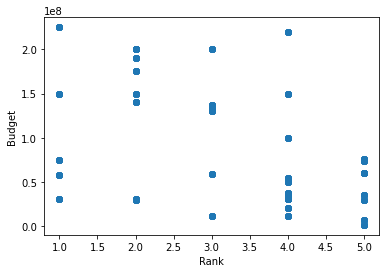

In [36]:
import matplotlib.pyplot as plt
plt.scatter(combined["rank"], combined["budget"] )
plt.ylabel("Budget")
plt.xlabel("Rank")
plt.show()

In [35]:
combined.describe()

,id,budget,revenue,runtime,vote_average,vote_count,index,year,rank
count,228.000000,2.280000e+02,2.280000e+02,38.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,91815.842105,8.974152e+07,5.530476e+08,118.394737,6.644737,4431.078947,6308.947368,2010.894737,3.236842
std,108059.295171,6.845471e+07,4.751557e+08,22.792293,0.759677,3559.611594,6515.920453,5.658985,1.349189
min,11.000000,1.377800e+06,0.000000e+00,63.000000,4.900000,135.000000,14.000000,2001.000000,1.000000
25%,8920.000000,3.100000e+07,1.375516e+08,98.000000,6.100000,1022.000000,671.000000,2008.000000,2.000000
50%,50341.500000,6.000000e+07,5.081371e+08,122.500000,6.750000,4322.500000,4069.500000,2012.500000,3.500000
75%,135397.000000,1.500000e+08,7.753980e+08,136.000000,7.300000,7458.000000,10392.000000,2015.000000,4.000000
max,334074.000000,2.250000e+08,1.519558e+09,165.000000,8.100000,11776.000000,24019.000000,2020.000000,5.000000
